## Determining Fake and Real News NLP

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

In [2]:
plt.style.use('bmh')

### Reading data

In [3]:
real = pd.read_csv('True.csv')
real['fake/real'] = 'Real'
real.head()

,title,text,subject,date,fake/real
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real


In [4]:
fake = pd.read_csv('Fake.csv')
fake['fake/real'] = 'Fake'
fake.head()

,title,text,subject,date,fake/real
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [5]:
df = pd.concat([fake,real],axis=0,ignore_index=True)
display(df.head())
df.tail()

,title,text,subject,date,fake/real
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


,title,text,subject,date,fake/real
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",Real
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",Real
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",Real
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",Real
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",Real


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         44898 non-null  object
 1   text          44898 non-null  object
 2   subject       44898 non-null  object
 3   date          44898 non-null  object
 4   fake/real     44898 non-null  object
 5   title_length  44898 non-null  int64 
 6   text_length   44898 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.4+ MB


In [32]:
df['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [11]:
df.groupby('fake/real').describe()

title                                                            \
           count unique                                                top   
fake/real                                                                    
Fake       23481  17903  MEDIA IGNORES Time That Bill Clinton FIRED His...   
Real       21417  20826  Factbox: Trump fills top jobs for his administ...   

                 text         \
          freq  count unique   
fake/real                      
Fake         6  23481  17455   
Real        14  21417  21192   

                                                                  subject  \
                                                         top freq   count   
fake/real                                                                   
Fake                                                          626   23481   
Real       (Reuters) - Highlights for U.S. President Dona...    8   21417   

                                        date                                  
          unique           top   freq  count unique                 top freq  
fake/real                                                                     
Fake           6          News   9050  23481   1681        May 10, 2017   46  
Real           2  politicsNews  11272  21417    716  December 20, 2017   182

In [28]:
df['title_length'] = df['title'].apply(len)
display(df.tail())
df.head()

,title,text,subject,date,fake/real,text_length,title_length
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",Real,2821,61
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",Real,800,52
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",Real,1950,49
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",Real,1199,61
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",Real,1338,52


,title,text,subject,date,fake/real,text_length,title_length
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake,2893,79
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake,1898,69
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake,3597,90
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake,2774,78
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake,2346,70


<AxesSubplot:ylabel='Frequency'>

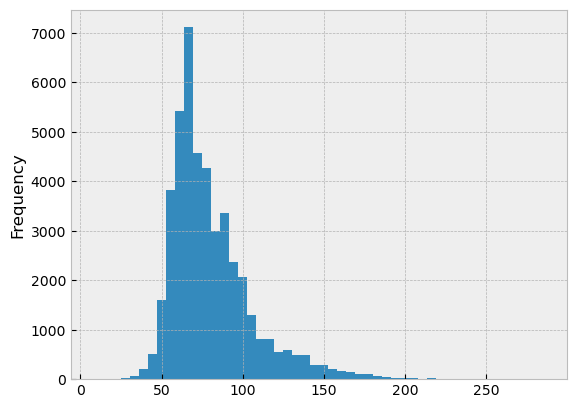

In [29]:
df['title_length'].plot(bins=50, kind='hist') 

array([<AxesSubplot:title={'center':'Fake'}>,
       <AxesSubplot:title={'center':'Real'}>], dtype=object)

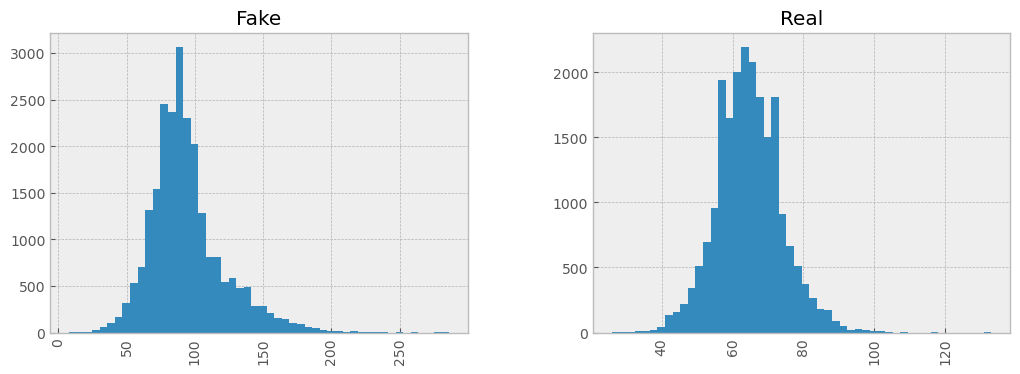

In [47]:
df.hist(column='title_length', by='fake/real', bins=50,figsize=(12,4))

In [49]:
df.groupby('fake/real').describe()['title_length']

,count,mean,std,min,25%,50%,75%,max
fake/real,,,,,,,,
Fake,23481.0,94.198032,27.184433,8.0,77.0,90.0,105.0,286.0
Real,21417.0,64.667881,9.168999,26.0,59.0,64.0,70.0,133.0


In [6]:
df['text_length'] = df['text'].apply(len)
display(df.tail())
df.head()

,title,text,subject,date,fake/real,text_length
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",Real,2821
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",Real,800
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",Real,1950
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",Real,1199
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",Real,1338


,title,text,subject,date,fake/real,text_length
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake,2893
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake,1898
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake,3597
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake,2774
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake,2346


<AxesSubplot:ylabel='Frequency'>

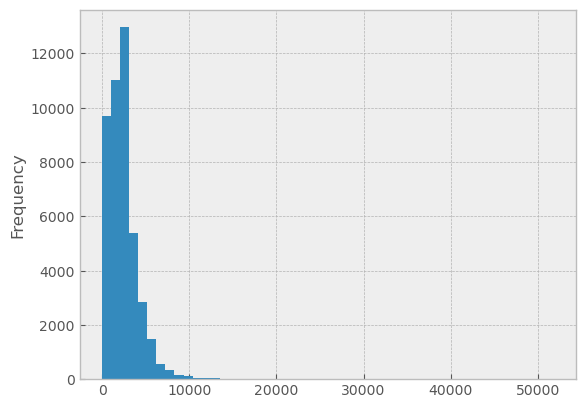

In [29]:
df['text_length'].plot(bins=50, kind='hist') 

array([<AxesSubplot:title={'center':'Fake'}>,
       <AxesSubplot:title={'center':'Real'}>], dtype=object)

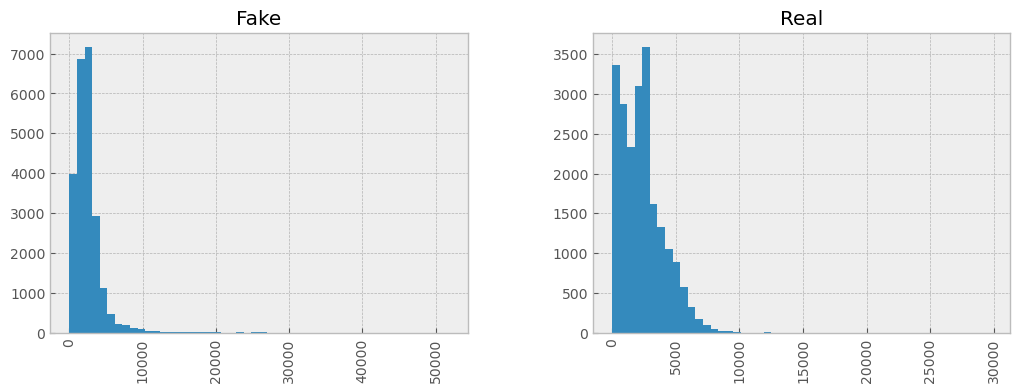

In [50]:
df.hist(column='text_length', by='fake/real', bins=50,figsize=(12,4))

In [51]:
df.groupby('fake/real').describe()['text_length']

,count,mean,std,min,25%,50%,75%,max
fake/real,,,,,,,,
Fake,23481.0,2547.396235,2532.884399,1.0,1433.0,2166.0,3032.0,51794.0
Real,21417.0,2383.278517,1684.835730,1.0,914.0,2222.0,3237.0,29781.0


### Text processing

In [8]:
# removing punctation and stopwords
import string
from nltk.corpus import stopwords

stop_set = set(stopwords.words('english'))

def text_processing(text):
    
    #removing punctuation
    no_punct = [s for s in text if s not in string.punctuation]
    no_punct = ''.join(no_punct)
    #returning list of words minus stopwords
    return [word for word in no_punct.split() if word.lower() not in stop_set]

In [79]:
df['text'].head(10).apply(text_processing)

0    [Donald, Trump, wish, Americans, Happy, New, Y...
1    [House, Intelligence, Committee, Chairman, Dev...
2    [Friday, revealed, former, Milwaukee, Sheriff,...
3    [Christmas, day, Donald, Trump, announced, wou...
4    [Pope, Francis, used, annual, Christmas, Day, ...
5    [number, cases, cops, brutalizing, killing, pe...
6    [Donald, Trump, spent, good, portion, day, gol...
7    [wake, yet, another, court, decision, derailed...
8    [Many, people, raised, alarm, regarding, fact,...
9    [might, thought, get, break, watching, people,...
Name: text, dtype: object

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(analyzer=text_processing).fit(df['text'])
print(len(vect.vocabulary_))

273619


In [11]:
bow = vect.transform(df['text'])

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(bow)
text_tfidf = tfidf_transformer.transform(bow)
print(text_tfidf.shape)

(44898, 273619)


### Model Training

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['fake/real'], test_size=0.2, random_state=0)

# nb = MultinomialNB()
# nb.fit(X_train,y_train)

In [15]:
#creating pipeline with all transformations
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_processing)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),
])

In [16]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x000001EA54591DC0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [17]:
predictions = pipeline.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

# print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions, target_names=["fake", "real"]))

              precision    recall  f1-score   support

        fake       0.98      0.96      0.97      4713
        real       0.95      0.98      0.97      4267

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



### Model Improving

In [21]:
from sklearn.model_selection import GridSearchCV

params = {'classifier__alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

grid = GridSearchCV(pipeline, params, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)


Best cross-validation score: 0.98
Best parameters:  {'classifier__alpha': 0.01}


In [26]:
print(confusion_matrix(y_test, grid.predict(X_test)))
print(classification_report(y_test, grid.predict(X_test), target_names=["fake", "real"]))

[[4624   89]
 [  34 4233]]
              precision    recall  f1-score   support

        fake       0.99      0.98      0.99      4713
        real       0.98      0.99      0.99      4267

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

